<h1>Sustainable Energy Transitions</h1>
<div>A project by <a href="http://www.ssgouridis.org" target="_blank" >Sgouris Sgouridis</a> and <a href="http://www.csaladen.es" target="_blank" >Dénes Csala</a> at <a  href="http://www.masdar.ac.ae" target="_blank">Masdar Institute of Science and Technology</a></div>
<h2><br>Resource distribution notebook</h2>

This workbook will guide you through the mining, processing, formatting and saving the renewable resource distribution input data for the <a target="_blank" href="http://set.csaladen.es/set2.html">SET 2.0</a> model.

<p>This is document has been created using  <a target="_blank" href="http://ipython.org/">IPython Notebook</a> in the <a target="_blank" href="https://store.continuum.io/cshop/anaconda/">Anaconda</a> distribution and it can be edited and run in <i>active</i> mode by clicking download in top right corner of this page. The code is partitioned into sections, called <i>cells</i>. When you are using this workbook in <i>active</i> mode, double-click on a cell to edit it and then run using <code>Ctrl + Enter</code>. Hitting <code>Shift + Enter</code> runs the code and steps into the next cell, while <code>Alt + Enter</code> runs the code and adds a new, empty cell. If you are running this notebook on a presonal computer, you will need a machine with at least <i>1GB</i> of memory (<i>2GB</i> recommended) and a processor of <i>1GHz</i>.
<h2>Data</h2>
<p>The outputs of this work are the calibration values for $\omega$, $\theta$ and $j$.
</p>
<h2>Processing</h2>
<p>The data processing has been done using the <a target="_blank" href="https://store.continuum.io/cshop/anaconda/">Anaconda</a> distribution of <a target="_blank" href="https://www.python.org/">Python 2.7</a> using the <i>IPython Notebook</i> editor. If you have not generated your own data, please download <a href="http://set.csaladen.es/data/results/index.html" target="_blank">all</a> results files, and run this <i>Iptyhon</i> notebook in the same folder. Then the data is loaded into a <a target="_blank" href="http://pandas.pydata.org/">pandas</a> dataframe, which represents the backbone of the data analysis. Numerical processing is done with <a target="_blank" href="http://www.numpy.org/">NumPy</a> and for plotting we use <a target="_blank" href="http://matplotlib.org/">matplotlib</a>. Please make sure you have all of these compoents set up in your <i>Python</i> installation.
</p>

<h1>Code</h1>

In [3]:
import matplotlib.pyplot as plt, pandas as pd, numpy as np, json, copy
%matplotlib inline
plt.style.use('ggplot')

## Country and region name converters

In [4]:
#country name converters

#EIA->pop
clist1={'North America':'Northern America',
'United States':'United States of America',
'Central & South America':'Latin America and the Caribbean',
'Bahamas, The':'Bahamas',
'Saint Vincent/Grenadines':'Saint Vincent and the Grenadines',
'Venezuela':'Venezuela (Bolivarian Republic of)',
'Macedonia':'The former Yugoslav Republic of Macedonia',
'Moldova':'Republic of Moldova',
'Russia':'Russian Federation',
'Iran':'Iran (Islamic Republic of)',
'Palestinian Territories':'State of Palestine',
'Syria':'Syrian Arab Republic',
'Yemen':'Yemen ',
'Congo (Brazzaville)':'Congo',
'Congo (Kinshasa)':'Democratic Republic of the Congo',
'Cote dIvoire (IvoryCoast)':"C\xc3\xb4te d'Ivoire",
'Gambia, The':'Gambia',
'Libya':'Libyan Arab Jamahiriya',
'Reunion':'R\xc3\xa9union',
'Somalia':'Somalia ',
'Sudan and South Sudan':'Sudan',
'Tanzania':'United Republic of Tanzania',
'Brunei':'Brunei Darussalam',
'Burma (Myanmar)':'Myanmar',
'Hong Kong':'China, Hong Kong Special Administrative Region',
'Korea, North':"Democratic People's Republic of Korea",
'Korea, South':'Republic of Korea',
'Laos':"Lao People's Democratic Republic",
'Macau':'China, Macao Special Administrative Region',
'Timor-Leste (East Timor)':'Timor-Leste',
'Virgin Islands,  U.S.':'United States Virgin Islands',
'Vietnam':'Viet Nam'}

#BP->pop
clist2={u'                 European Union #':u'Europe',
u'Rep. of Congo (Brazzaville)':u'Congo (Brazzaville)',
'Republic of Ireland':'Ireland',
'China Hong Kong SAR':'China, Hong Kong Special Administrative Region',
u'Total Africa':u'Africa',
u'Total North America':u'Northern America',
u'Total S. & Cent. America':'Latin America and the Caribbean',
u'Total World':u'World',
u'Total World ':u'World',
'South Korea':'Republic of Korea',
u'Trinidad & Tobago':u'Trinidad and Tobago',
u'US':u'United States of America'}

#WD->pop
clist3={u"Cote d'Ivoire":"C\xc3\xb4te d'Ivoire",
u'Congo, Rep.':u'Congo (Brazzaville)',
u'Caribbean small states':'Carribean',
u'East Asia & Pacific (all income levels)':'Eastern Asia',
u'Egypt, Arab Rep.':'Egypt',
u'European Union':u'Europe',
u'Hong Kong SAR, China':u'China, Hong Kong Special Administrative Region',
u'Iran, Islamic Rep.':u'Iran (Islamic Republic of)',
u'Kyrgyz Republic':u'Kyrgyzstan',
u'Korea, Rep.':u'Republic of Korea',
u'Latin America & Caribbean (all income levels)':'Latin America and the Caribbean',
u'Macedonia, FYR':u'The former Yugoslav Republic of Macedonia',
u'Korea, Dem. Rep.':u"Democratic People's Republic of Korea",
u'South Asia':u'Southern Asia',
u'Sub-Saharan Africa (all income levels)':u'Sub-Saharan Africa',
u'Slovak Republic':u'Slovakia',
u'Venezuela, RB':u'Venezuela (Bolivarian Republic of)',
u'Yemen, Rep.':u'Yemen ',
u'Congo, Dem. Rep.':u'Democratic Republic of the Congo'}

#COMTRADE->pop
clist4={u"Bosnia Herzegovina":"Bosnia and Herzegovina",
u'Central African Rep.':u'Central African Republic',
u'China, Hong Kong SAR':u'China, Hong Kong Special Administrative Region',
u'China, Macao SAR':u'China, Macao Special Administrative Region',
u'Czech Rep.':u'Czech Republic',
u"Dem. People's Rep. of Korea":"Democratic People's Republic of Korea",
u'Dem. Rep. of the Congo':"Democratic Republic of the Congo",
u'Dominican Rep.':u'Dominican Republic',
u'Fmr Arab Rep. of Yemen':u'Yemen ',
u'Fmr Ethiopia':u'Ethiopia',
u'Fmr Fed. Rep. of Germany':u'Germany',
u'Fmr Panama, excl.Canal Zone':u'Panama',
u'Fmr Rep. of Vietnam':u'Viet Nam',
u"Lao People's Dem. Rep.":u"Lao People's Democratic Republic",
u'Occ. Palestinian Terr.':u'State of Palestine',
u'Rep. of Korea':u'Republic of Korea',
u'Rep. of Moldova':u'Republic of Moldova',
u'Serbia and Montenegro':u'Serbia',
u'US Virgin Isds':u'United States Virgin Islands',
u'Solomon Isds':u'Solomon Islands',
u'United Rep. of Tanzania':u'United Republic of Tanzania',
u'TFYR of Macedonia':u'The former Yugoslav Republic of Macedonia',
u'USA':u'United States of America',
u'USA (before 1981)':u'United States of America',
}

#Jacobson->pop
clist5={u"Korea, Democratic People's Republic of":"Democratic People's Republic of Korea",
u'All countries':u'World',
u"Cote d'Ivoire":"C\xc3\xb4te d'Ivoire",
u'Iran, Islamic Republic of':u'Iran (Islamic Republic of)',
u'Macedonia, Former Yugoslav Republic of':u'The former Yugoslav Republic of Macedonia',
u'Congo, Democratic Republic of':u"Democratic Republic of the Congo",
u'Korea, Republic of':u'Republic of Korea',
u'Tanzania, United Republic of':u'United Republic of Tanzania',
u'Moldova, Republic of':u'Republic of Moldova',
u'Hong Kong, China':u'China, Hong Kong Special Administrative Region',
u'All countries.1':"World"
}

#NREL solar->pop
clist6={u"Antigua & Barbuda":u'Antigua and Barbuda',
u"Bosnia & Herzegovina":u"Bosnia and Herzegovina",
u"Brunei":u'Brunei Darussalam',
u"Cote d'Ivoire":"C\xc3\xb4te d'Ivoire",
u"Iran":u'Iran (Islamic Republic of)',
u"Laos":u"Lao People's Democratic Republic",
u"Libya":'Libyan Arab Jamahiriya',
u"Moldova":u'Republic of Moldova',
u"North Korea":"Democratic People's Republic of Korea",
u"Reunion":'R\xc3\xa9union',
u'Sao Tome & Principe':u'Sao Tome and Principe',
u'Solomon Is.':u'Solomon Islands',
u'St. Lucia':u'Saint Lucia',
u'St. Vincent & the Grenadines':u'Saint Vincent and the Grenadines',
u'The Bahamas':u'Bahamas',
u'The Gambia':u'Gambia',
u'Virgin Is.':u'United States Virgin Islands',
u'West Bank':u'State of Palestine'
}

#NREL wind->pop
clist7={u"Antigua & Barbuda":u'Antigua and Barbuda',
u"Bosnia & Herzegovina":u"Bosnia and Herzegovina",
u'Occupied Palestinian Territory':u'State of Palestine',
u'China Macao SAR':u'China, Macao Special Administrative Region',
#"C\xc3\xb4te d'Ivoire":"C\xc3\xb4te d'Ivoire",
u'East Timor':u'Timor-Leste',
u'TFYR Macedonia':u'The former Yugoslav Republic of Macedonia',
u'IAM-country Total':u'World'
}

#country entroids->pop
clist8={u'Burma':'Myanmar',
u"Cote d'Ivoire":"C\xc3\xb4te d'Ivoire",
u'Republic of the Congo':u'Congo (Brazzaville)',
u'Reunion':'R\xc3\xa9union'
}

def cnc(country):
    if country in clist1: return clist1[country]
    elif country in clist2: return clist2[country]
    elif country in clist3: return clist3[country]
    elif country in clist4: return clist4[country]
    elif country in clist5: return clist5[country]
    elif country in clist6: return clist6[country]
    elif country in clist7: return clist7[country]
    elif country in clist8: return clist8[country]
    else: return country

# Population

Consult the notebook entitled *pop.ipynb* for the details of mining the data from the UN statistics division online database. Due to being the reference database for country names cell, the cell below needs to be run first, before any other databases.

In [5]:
#use local path
#pop_path='https://dl.dropboxusercontent.com/u/531697/datarepo/netset/db/
pop_path='E:/Dropbox/Public/datarepo/netset/db/'

In [6]:
#population data
pop=pd.read_csv(pop_path+'pop.csv').set_index(['Country','Year']).unstack(level=1)
pop.head(3)

Value                                                    \
Year           1950.0    1951.0    1952.0    1953.0    1954.0    1955.0   
Country                                                                   
Afghanistan    7451.0    7547.0    7651.0    7763.0    7882.0    8010.0   
Africa       228827.0  233364.0  238148.0  243180.0  248460.0  253988.0   
Albania        1214.0    1243.0    1276.0    1311.0    1350.0    1390.0   

                                                       ...                 \
Year           1956.0    1957.0    1958.0    1959.0    ...         2091.0   
Country                                                ...                  
Afghanistan    8146.0    8290.0    8443.0    8604.0    ...        61322.0   
Africa       259762.0  265780.0  272039.0  278537.0    ...      3933881.0   
Albania        1433.0    1477.0    1523.0    1570.0    ...         2329.0   

                                                                               \
Year            2092.0     2093.0     2094.0     2095.0     2096.0     2097.0   
Country                                                                         
Afghanistan    61112.0    60897.0    60676.0    60449.0    60218.0    59982.0   
Africa       3963991.0  3993557.0  4022570.0  4051019.0  4078898.0  4106198.0   
Albania         2314.0     2299.0     2285.0     2272.0     2260.0     2248.0   

                                              
Year            2098.0     2099.0     2100.0  
Country                                       
Afghanistan    59741.0    59497.0    59249.0  
Africa       4132914.0  4159041.0  4184577.0  
Albania         2237.0     2226.0     2217.0  

[3 rows x 151 columns]

# Define database parsers and units

In [7]:
#initialize data and constants
data={}
countries={i for i in pop.index}
years={int(i[1]) for i in pop.columns}
dbs={'bp','eia'}
datatypes={'prod','cons','emi','res'}
allfuels=['oil','coal','gas','nuclear','biofuels','hydro','geo_other','solar','wind']
fossils=['oil','coal','gas']+['nrg','nrg_sum']
transp=1 #transparency
#colorlist=np.array([[166,86,40,transp*255],[153,153,153,transp*255],[152,78,163,transp*255],
#                    [228,26,28,transp*255],[247,129,191,transp*255],[55,126,184,transp*255],
#                    [82,56,65,transp*255],[255,255,51,transp*255],[77,175,74,transp*255]])/255.0
colorlist=np.array([[131,13,9,transp*255],[85,20,52,transp*255],[217,20,14,transp*255],
                    [213,9,98,transp*255],[64,185,85,transp*255],[202,200,46,transp*255],
                    [106,23,9,transp*255],[251,212,31,transp*255],[112,133,16,transp*255]])/255.0
gcolors={allfuels[i]:colorlist[i] for i in range(len(allfuels))}

def reset(what='all',datatype='all'):
    global data
    if what=='all':
        #reset all values of database
        fuels=allfuels+['nrg','nrg_sum']
        data={i:{int(k[1]):{'energy':{j:{k:{l:np.NaN for l in dbs} for k in datatypes}\
                              for j in fuels},'population':long(pop.loc[i][k])*1000,\
                                              'consumer_efficiency':0.5,\
                                              'cumulative_emissions':0}\
                              for k in pop.columns}\
                              #we use population as the default database for country names
                              for i in pop.index} 
    else:
        countries=data.keys()
        for i in countries:
            for j in years:
                if datatype=='all':
                    data[i][j]['energy'][what]={k:{l:np.NaN for l in dbs} for k in datatypes}
                else:
                    data[i][j]['energy'][what][datatype]={l:np.NaN for l in dbs}

reset()

kbpd_to_TWh=365.25*0.001628200 #unit conversion from thousand barrels of oil per day to TWh per year
Gboe_to_TWh=1628.2 #unit conversion from thousand million barrels of oil to TWh
EJ_to_TWh=277.77 #unit conversion from exa Joule to TWh
bcf_to_TWh=0.2931 #unit conversion from billion cubic feet of natural gas to TWh
tcf_to_TWh=bcf_to_TWh*1000.0 #unit conversion from trillion cubic feet of natural gas to TWh
qbtu_to_TWh=293.297222 #unit conversion from quadrillion British thermal units to TWh
mtoe_to_TWh=11.63 #unit conversion million metric tons of oil equivalent to TWh
kgge_to_gm3=1.49 #unit conversion from kilogram of natural gas to cubic meter, based on CH4
mtlnge_to_TWh=14.45 #unit conversion million metric tons of gas (LNG) equivalent to TWh
cm_to_cf=35.3 #unit conversion from million cubic meters to million cubic feet
tcm_to_TWh=tcf_to_TWh*cm_to_cf #unit conversion from trillion cubic meters of natural gas to TWh
kgge_to_TWh=kgge_to_gm3*tcf_to_TWh*cm_to_cf*1e-18 #unit conversion from kilogram of natural gas to TWh
#mtge_to_TWh=kgge_to_gm3*tcf_to_TWh*cm_to_cf*1e-9 #unit conversion from kilogram of natural gas to TWh
mtge_to_GJ=53.6
mtge_to_TWh=mtge_to_GJ*1e-9*EJ_to_TWh
t_to_st=1.10231 #unit conversion from metric ton to short ton
tcoe_to_toe=0.7 #unit conversion from metric tons of coal equivalent to metric tons of oil equivalent
mtcoe_to_TWh=tcoe_to_toe*mtoe_to_TWh #unit conversion million metric tons of coal equivalent to TWh
#mtcoe_to_TWh=8.141
mstcoe_to_TWh=mtcoe_to_TWh*t_to_st #unit conversion million metric short tons of coal equivalent to TWh
c_to_co2=44.0/12 #unit conversion from C to CO2 mass

carbon_budget=840*c_to_co2 #840 GtC as per http://www.ipcc.ch/report/ar5/wg1/

In [8]:
path = 2 #set database path
#online path = 0
#backup path = 1
#local path  = 2

## Read, process & convert renewable resource maps

CSP

In [7]:
solar=pd.read_excel(pop_path+'maps/nrelsolar.xlsx',sheetname='DNI')
#http://en.openei.org/doe-opendata/dataset/19316a50-e55d-45e2-b692-efcebfe16c95/resource/3e72f32a-7de1-4e5d-a25a-76928769625f/download/solarresourceenergy.xlsx
solar_res={}
solar_cf={}
for i in solar.T.iteritems():
    country=cnc(i[1][0])
    if i[0]<10: #record capacity factors
        solar_cf[i[1][9]]=i[1][10]
    if country in data:
        if country not in solar_res:solar_res[country]={}
        clas=i[1][1]
        cap=i[1][5]/1000.0 #workbook doest not import commas correctly, fix
        solar_res[country][clas]=cap

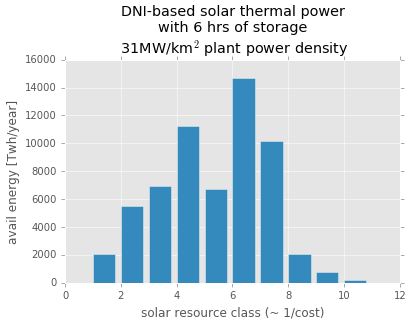

In [8]:
plt.bar(solar_res['United States of America'].keys(),solar_res['United States of America'].values())
plt.ylabel('avail energy [Twh/year]')
plt.title('DNI-based solar thermal power\nwith 6 hrs of storage\n 31MW/km$^2$ plant power density')
plt.xlabel('solar resource class (~ 1/cost)')

PV

In [9]:
solar=pd.read_excel(pop_path+'maps/nrelsolar.xlsx',sheetname='Tilt=Lat')
#http://en.openei.org/doe-opendata/dataset/19316a50-e55d-45e2-b692-efcebfe16c95/resource/3e72f32a-7de1-4e5d-a25a-76928769625f/download/solarresourceenergy.xlsx
solar_res2={}
for i in solar.T.iteritems():
    country=cnc(i[1][0])
    if country in data:
        if country not in solar_res2:solar_res2[country]={}
        clas=i[1][1]
        cap=i[1][6]
        solar_res2[country][clas]=cap

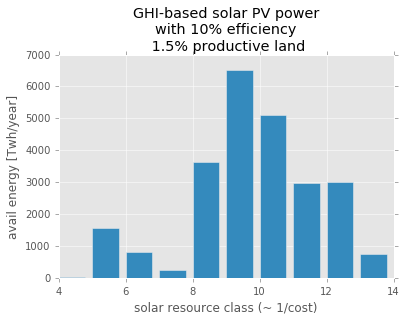

In [10]:
plt.bar(solar_res2['United States of America'].keys(),solar_res2['United States of America'].values())
plt.ylabel('avail energy [Twh/year]')
plt.title('GHI-based solar PV power\nwith 10% efficiency\n 1.5% productive land')
plt.xlabel('solar resource class (~ 1/cost)')

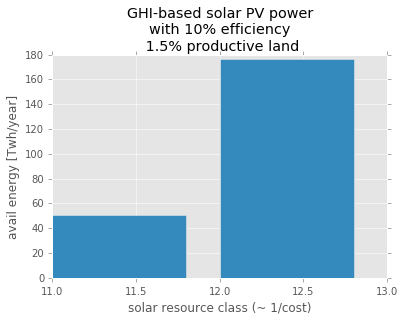

In [11]:
plt.bar(solar_res2['United Arab Emirates'].keys(),solar_res2['United Arab Emirates'].values())
plt.ylabel('avail energy [Twh/year]')
plt.title('GHI-based solar PV power\nwith 10% efficiency\n 1.5% productive land')
plt.xlabel('solar resource class (~ 1/cost)')

convert to capacities

In [9]:
def interpolate(d,years,gfit=2,depth=1,polyorder=1,override=False,ends=False):
#d=helper
#years=[2015]
#gfit=1
#depth=extrapolatedict[fuel]
#polyorder=1
#override=True
#ends=True
#if True:
    #depth * length of interpolation substrings will be taken to the left and right
    #for example for {1971:5,1972:6,1973:7,1974:5} interpolating it over 1969-1990
    #for the section 1960-1970 (2 elements) the values from 1972,1973,1974 (3 elements) will be taken with depth 1.5
    #for the section 1974-1990 (15 elements) all values  (4 elements) will be taken to extrapolate
    #override to extend interpolation to edges, i.e. extrapolate
    if (gfit>2): 
        print 'interpolate takes only 1 (polynomial) or 2 (exponential) as 3rd argument [default=2]'
        return
    mydict={}
    if d!={}:
        missing_points=[[]]
        onbeginning=False
        onend=False
        for year in years:
            if year not in d.keys():
                missing_points[-1].append(year)
            else:
                missing_points.append([])
        for m in missing_points:
            if m:
                fit=gfit

                #if only one point, set min extrapolation depth to 2
                if (len(m)==1): depth=max(depth,2)
                
                #check if it is ends of the interval, 
                if ((m[-1]<np.sort(d.keys())[0])|(m[0]>np.sort(d.keys())[-1])): 
                    #if not set to override then extrapolate mean only
                    if not override: 
                        fit=0                    

                if fit==0: #take average
                    y = {k: d[k] for k in set(d.keys()).intersection(range(int(max(min(years),min(m)-int(3))),\
                                                                           int(min(max(years),max(m)+int(3))+1)))}
                    #returned empty, on beginning
                    if y=={}:
                        if m[-1]<np.sort(d.keys())[0]:y={np.sort(d.keys())[0]:d[np.sort(d.keys())[0]]}
                        elif m[0]>np.sort(d.keys())[-1]:y={np.sort(d.keys())[-1]:d[np.sort(d.keys())[-1]]}
                    for i in range(len(m)):
                        mydict[m[i]]=np.mean(y.values())
                elif fit==1:
                    #intersector
                    y = {k: d[k] for k in set(d.keys()).intersection(range(int(max(min(years),\
                                min(m)-int(depth*len(m)))),int(min(max(years),max(m)+int(depth*len(m)))+1)))}
                    #returned empty
                    if y=={}:
                        if m[-1]<np.sort(d.keys())[0]:y={np.sort(d.keys())[0]:d[np.sort(d.keys())[0]]}
                        elif m[0]>np.sort(d.keys())[-1]:y={np.sort(d.keys())[-1]:d[np.sort(d.keys())[-1]]}
                            
                    w = np.polyfit(y.keys(),y.values(),polyorder) # obtaining regression parameters
                    if (polyorder==1):
                        intersector=w[0]*np.array(m)+w[1]
                    else:
                        intersector=w[0]*np.array(m)*np.array(m)+w[1]*np.array(m)+w[2]
                    for i in range(len(m)):
                        mydict[m[i]]=max(0,intersector[i])
                else:
                    #exponential intersector
                    y = {k: d[k] for k in set(d.keys()).intersection(range(int(max(min(years),\
                                min(m)-int(depth*len(m)))),int(min(max(years),max(m)+int(depth*len(m)))+1)))}
                    #returned empty
                    if y=={}:
                        if m[-1]<np.sort(d.keys())[0]:y={np.sort(d.keys())[0]:d[np.sort(d.keys())[0]]}
                        elif m[0]>np.sort(d.keys())[-1]:y={np.sort(d.keys())[-1]:d[np.sort(d.keys())[-1]]}
                    
                    w = np.polyfit(y.keys(),np.log(y.values()),1) # obtaining log regression parameters (exp fitting)
                    intersector=np.exp(w[1])*np.exp(w[0]*np.array(m))
                    for i in range(len(m)):
                        mydict[m[i]]=max(0,intersector[i])
                    
                #record ends adjustment beginning and end
                if ends:
                    if (m[-1]<np.sort(d.keys())[0]):
                        onbeginning=True
                        beginning=m[-1]
                    if (m[0]>np.sort(d.keys())[-1]): 
                        onend=True
                        end=m[0]
        #finish ends adjustment
        if ends:
            if onbeginning:
                #calculate adjustment scaler
                if (mydict[beginning]==0): scaler=0
                elif (beginning+1 in d): scaler=d[beginning+1]*1.0/mydict[beginning]
                else: scaler=d[np.sort(d.keys())[0]]*1.0/mydict[beginning]
                #readjust data
                for year in mydict:
                    if (year<=beginning):
                        mydict[year]*=scaler
            if onend:
                #calculate adjustment scaler
                if (mydict[end]==0): scaler=0
                elif (end-1 in d): scaler=d[end-1]*1.0/mydict[end]
                else: scaler=d[np.sort(d.keys())[-1]]*1.0/mydict[end]
                #readjust data
                for year in mydict:
                    if (year>=end):
                        mydict[year]*=scaler

    #return interpolated points
    return mydict

In [13]:
#extrapolate solar classes
helper=interpolate(solar_cf,range(0,15),1,1,2,True,True)
solar_cf.update(helper)

C:\Anaconda\envs\py27\lib\site-packages\numpy\lib\polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


In [14]:
solar_cap={}
for i in solar_res:
    if i not in solar_cap:solar_cap[i]={}
    for j in solar_res[i]:
        solar_cap[i][j]=solar_res[i][j]*solar_cf[j]/8760
solar_cap2={}
for i in solar_res2:
    if i not in solar_cap2:solar_cap2[i]={}
    for j in solar_res2[i]:
        solar_cap2[i][j]=solar_res2[i][j]*solar_cf[j]/8760       

wind

In [15]:
wind=pd.read_excel(pop_path+'maps/nrelwind.xlsx',sheetname='Onshore Power',skiprows=2)
#http://en.openei.org/doe-opendata/dataset/c186913f-6684-4455-a2f2-f26e152a9b35/resource/4dc4a6fd-3a63-47df-bcbe-e9c83b83b38e/download/nrelcfddawindsc20130603.xlsx
wind_cap={}
for i in wind.T.iteritems():
    country=i[1][0]
    if country in data:
        for k in range(1,10):
            if country not in wind_cap:wind_cap[country]={}
            clas=k
            cap=i[1][k] + i[1][k+10]# + i[1][k+20] #last one too far 0-50,50-100,100-5000
            wind_cap[country][clas]=cap/1000.0 #workbook reported values in GW, we use TW

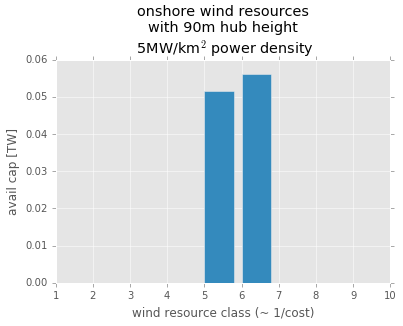

In [16]:
plt.bar(wind_cap['Argentina'].keys(),wind_cap['Denmark'].values())
plt.ylabel('avail cap [TW]')
plt.title('onshore wind resources\nwith 90m hub height\n 5MW/km$^2$ power density')
plt.xlabel('wind resource class (~ 1/cost)')

In [17]:
wind=pd.read_excel(pop_path+'maps/nrelwind.xlsx',sheetname='Onshore Energy',skiprows=2)
#http://en.openei.org/doe-opendata/dataset/c186913f-6684-4455-a2f2-f26e152a9b35/resource/4dc4a6fd-3a63-47df-bcbe-e9c83b83b38e/download/nrelcfddawindsc20130603.xlsx
wind_res={}
for i in wind.T.iteritems():
    country=i[1][0]
    if country in data:
        for k in range(1,10):
            if country not in wind_res:wind_res[country]={}
            clas=k
            cap=i[1][k] + i[1][k+10]# + i[1][k+20] #last one too far 0-50,50-100,100-5000
            wind_res[country][clas]=cap*1000.0 #workbook reported values in PWh, we use TWh

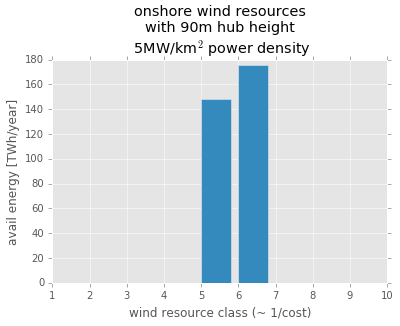

In [18]:
plt.bar(wind_res['Argentina'].keys(),wind_res['Denmark'].values())
plt.ylabel('avail energy [TWh/year]')
plt.title('onshore wind resources\nwith 90m hub height\n 5MW/km$^2$ power density')
plt.xlabel('wind resource class (~ 1/cost)')

In [19]:
wind=pd.read_excel(pop_path+'maps/nrelwind.xlsx',sheetname='Offshore Energy',skiprows=3)
#http://en.openei.org/doe-opendata/dataset/c186913f-6684-4455-a2f2-f26e152a9b35/resource/4dc4a6fd-3a63-47df-bcbe-e9c83b83b38e/download/nrelcfddawindsc20130603.xlsx
wind_res2={}
country=''
for i in wind.T.iteritems():
    if str(i[1][0])!='nan':
        country=str(i[1][0])
    water=str(i[1][1])
    if water in {'shallow','transitional'}: #skip deep for now
        if country in data:
            for k in range(2,11):
                if country not in wind_res2:wind_res2[country]={}
                clas=k-1
                cap=i[1][k] + i[1][k+10]# + i[1][k+20] #last one too far 0-50,50-100,100-5000
                if clas not in wind_res2[country]:wind_res2[country][clas]=0
                wind_res2[country][clas]+=cap*1000.0

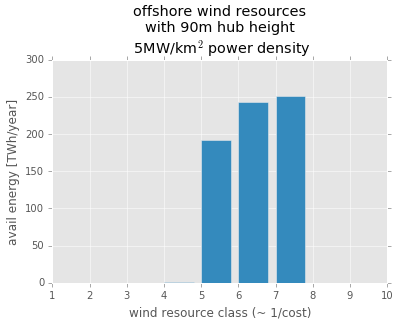

In [20]:
plt.bar(wind_res2['Denmark'].keys(),wind_res2['Denmark'].values())
plt.ylabel('avail energy [TWh/year]')
plt.title('offshore wind resources\nwith 90m hub height\n 5MW/km$^2$ power density')
plt.xlabel('wind resource class (~ 1/cost)')

In [21]:
wind=pd.read_excel(pop_path+'maps/nrelwind.xlsx',sheetname='Offshore Power',skiprows=3)
#http://en.openei.org/doe-opendata/dataset/c186913f-6684-4455-a2f2-f26e152a9b35/resource/4dc4a6fd-3a63-47df-bcbe-e9c83b83b38e/download/nrelcfddawindsc20130603.xlsx
wind_cap2={}
country=''
for i in wind.T.iteritems():
    if str(i[1][0])!='nan':
        country=str(i[1][0])
    water=str(i[1][1])
    if water in {'shallow','transitional'}: #skip deep for now
        if country in data:
            for k in range(2,11):
                if country not in wind_cap2:wind_cap2[country]={}
                clas=k-1
                cap=i[1][k] + i[1][k+10]# + i[1][k+20] #last one too far 0-50,50-100,100-5000
                if clas not in wind_cap2[country]:wind_cap2[country][clas]=0
                wind_cap2[country][clas]+=cap/1000.0

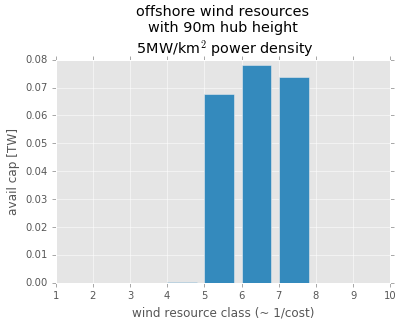

In [22]:
plt.bar(wind_cap2['Denmark'].keys(),wind_cap2['Denmark'].values())
plt.ylabel('avail cap [TW]')
plt.title('offshore wind resources\nwith 90m hub height\n 5MW/km$^2$ power density')
plt.xlabel('wind resource class (~ 1/cost)')

## Save resource data

In [23]:
res={}
for i in solar_res:
    if i not in res: res[i]={"wind":{"cap":{},"res":{}},"pv":{"cap":{},"res":{}},"csp":{"cap":{},"res":{}}}
    res[i]["csp"]["res"]=solar_res[i]
    res[i]["csp"]["cap"]=solar_cap[i]
    res[i]["pv"]["res"]=solar_res2[i]
    res[i]["pv"]["cap"]=solar_cap2[i]
for i in wind_res: #onshore
    if i not in res: res[i]={"wind":{"cap":{},"res":{}},"pv":{"cap":{},"res":{}},"csp":{"cap":{},"res":{}}}    
    res[i]["wind"]["res"]=wind_res[i]
    res[i]["wind"]["cap"]=wind_cap[i]
for i in wind_res2: #offshore
    if i not in res: res[i]={"wind":{"cap":{},"res":{}},"pv":{"cap":{},"res":{}},"csp":{"cap":{},"res":{}}}    
    for j in wind_res2[i]:
        if j not in res[i]["wind"]["res"]:res[i]["wind"]["res"][j]=0
        res[i]["wind"]["res"][j]+=wind_res2[i][j]
    for j in wind_cap2[i]:
        if j not in res[i]["wind"]["cap"]:res[i]["wind"]["cap"][j]=0
        res[i]["wind"]["cap"][j]+=wind_cap2[i][j]

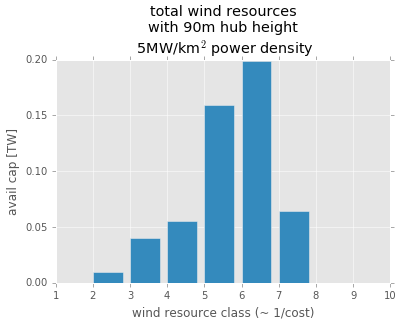

In [24]:
plt.bar(res['Norway']['wind']['cap'].keys(),res['Norway']['wind']['cap'].values())
plt.ylabel('avail cap [TW]')
plt.title('total wind resources\nwith 90m hub height\n 5MW/km$^2$ power density')
plt.xlabel('wind resource class (~ 1/cost)')

In [25]:
#save data
file('data/resources/res.json','w').write(json.dumps(res))

## Potentials

Estimate remaining potentials

In [26]:
#biomass
#http://www.sciencedirect.com/science/article/pii/S0961953414005340
#Table 5, they all come on one tier
#nuclear
#the chance for developing nuclear is essentially zero, e.g. infinite cost
#hydro
#http://www.intpow.com/index.php?id=487&download=1

create EROEI - resource class functions

In [27]:
#load savedata if exists
predata=json.loads(file('data/resources/res.json','r').read())
res={}
for c in predata:
    res[c]={}
    for f in predata[c]:
        res[c][f]={}
        for r in predata[c][f]:
            res[c][f][r]={}
            for year in predata[c][f][r]:
                res[c][f][r][int(year)]=predata[c][f][r][year]
predata={}

In [28]:
#check
res['Afghanistan']['csp']['res']

{1: 0.14894710891899998,
 2: 39.526918731184,
 3: 212.81736247049523,
 4: 343.88919981628334,
 5: 432.757817556891,
 6: 3079.03440882861,
 7: 767.4486675578074}

resource normalization

In [29]:
#pv classes = 4-14
#wind classes = 1-9
#csp classes = 1-10

def histo(x,y,b): #one elment histogram rebin interpolator (for wind 9->10 classes)
    if b>len(x):
        if b==10 and len(x)==9:
            yy=np.histogram(x,weights=y,bins=b)[0]
            #return yy #turn off
            toadd=((yy[3]+yy[5])/2.0)*0.7 #multipl. to adjust for recurrency .88 approx.
            shares=np.array(yy)/np.sum(yy) #redistribute based on resource size
            for s in range(10):
                if s not in [4]:
                    shares[s]*=(abs(1.0/(4-s))) #scale based on dist from number
            shares=shares/np.sum(shares)
            for s in range(10):
                if s not in [4]:
                    yy[s]-=toadd*shares[s]
                    yy[4]+=toadd*shares[s]
            return yy
        else: print "error, this is a custom function..."
    else:
        return np.histogram(x,weights=y,bins=b)[0]

lim={"pv":[4,14],"wind":[1,9],"csp":[1,10]}

newres={}
for c in res:
    newres[c]={}
    for r in res[c]:
        newres[c][r]={}
        for f in res[c][r]:
            newres[c][r][f]={}
            helper=dict(res[c][r][f])
            x=[]
            y=[]
            for k in range(0,15):
                if k<lim[r][0] or k>lim[r][1]: #pop items outside class limits - these are small errors
                    if k in helper:helper.pop(k);
                elif k not in helper:helper[k]=0 #else insert it if is not there already
            for i in range(len(sorted(helper.keys()))):
                x.append(float(sorted(helper.keys())[i]))
                y.append(float(helper[sorted(helper.keys())[i]]))
            #plt.figure()
            #plt.bar(x,y,alpha=0.6)
            yy=histo(x,y,10)        
            xx=range(1,11)
            #plt.bar(xx,yy,alpha=0.6,color='red')
            for i in xx:
                newres[c][r][f][i]=yy[i-1]

In [42]:
res=newres

In [43]:
#save data
file('data/resources/res_exp.json','w').write(json.dumps(res))

In [10]:
#load res savedata if exists
predata=json.loads(file('data/resources/res_exp.json','r').read())
res={}
for c in predata:
    res[c]={}
    for f in predata[c]:
        res[c][f]={}
        for r in predata[c][f]:
            res[c][f][r]={}
            for year in predata[c][f][r]:
                res[c][f][r][int(year)]=predata[c][f][r][year]
predata={}

In [11]:
#load energy savedata (from output of calculator.ipynb)
predata=json.loads(file('data/historical/savedata.json','r').read())
data={}
for c in predata:
    data[c]={}
    for year in predata[c]:
        data[c][int(year)]=predata[c][year]
predata={}

exponential distribution

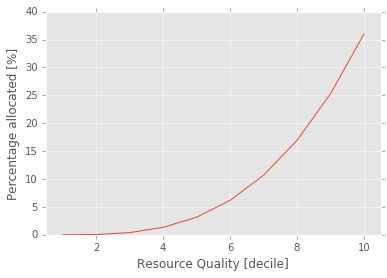

In [12]:
#class-based distribution function
pwr=3
s=sum([i**pwr for i in range(10)])*1.0
classconverter={i+1:i**pwr/s for i in range(10)}
plt.plot(classconverter.keys(),np.array(classconverter.values())*100)#,color='#dd1c77',lw=2,alpha=0.9, align='center')
plt.xlabel('Resource Quality [decile]')
plt.ylabel('Percentage allocated [%]')
plt.xlim(0.5,10.5)
plt.show()

[  0.           2.77777778  22.22222222  75.        ] [ 0.          0.16666667  1.33333333  4.5       ]


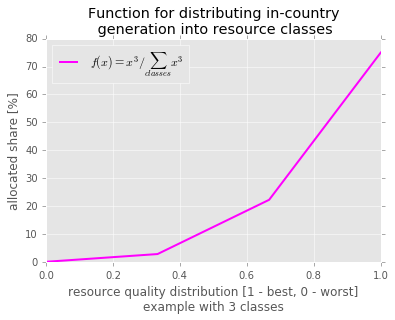

In [52]:
l=4
k=np.array([i**3 for i in range(l)])
plt.plot(np.arange(l)/3.0,k*100.0/sum(k),'magenta',lw=2,label=u'$f(x)=x^3/\sum_{classes}{x^3}$')
print k*100.0/sum(k),k*6.0/sum(k)
plt.ylabel("allocated share [%]")
plt.xlabel("resource quality distribution [1 - best, 0 - worst]\nexample with 3 classes")
plt.title("Function for distributing in-country\n generation into resource classes")
plt.legend(loc=2)
plt.savefig('res3exp.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
plt.show()

[  0.           0.22675737   1.81405896   6.12244898  14.51247166
  28.3446712   48.97959184] [ 0.          0.01133787  0.09070295  0.30612245  0.72562358  1.41723356
  2.44897959]


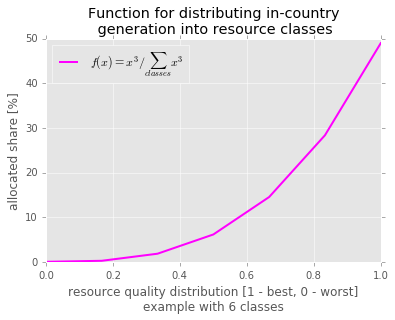

In [53]:
l=7
k=np.array([i**3 for i in range(l)])
plt.plot(np.arange(l)/6.0,k*100.0/sum(k),'magenta',lw=2,label=u'$f(x)=x^3/\sum_{classes}{x^3}$')
print k*100.0/sum(k),k*5.0/sum(k)
plt.ylabel("allocated share [%]")
plt.xlabel("resource quality distribution [1 - best, 0 - worst]\nexample with 6 classes")
plt.title("Function for distributing in-country\n generation into resource classes")
plt.legend(loc=2)
plt.savefig('res6exp.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
plt.show()

In [13]:
def classconvert(a,b,pwr=3):#a classed resource in 10 classes, return exponential distribution, with fill control
    classvector=[]
    for i in range(1,11):
        if a[i]>0:
            if not np.isnan(a[i]):
                classvector.append(i)
    s=sum([i**pwr for i in classvector])*1.0
    z={}
    for i in range(1,11):
        if i in classvector:
            z[i]=i**pwr/s
        else: z[i]=0
    w={}
    tofill=b
    for i in range(10,0,-1):
        if a[i]>0:
            if tofill*z[i]>a[i]: #used to be tofill>a[i]:
                w[i]=a[i]/b
                tofill-=a[i]
                z.pop(i);
            else: break
    q=sum(w.values())
    for i in range(1,11):
        if i not in w:
            w[i]=max(0,z[i]/sum(z.values())*(1.0-q))
    return w

ERROR Democratic Republic of the Congo
pv weighted average class of resources 7.12773500916
pv weighted average class of generation 6.23294322676
pv normalized resource utilization 0.87446337704


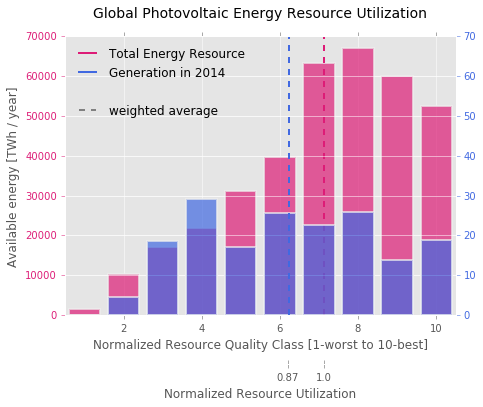

csp weighted average class of resources 5.01079508516
csp weighted average class of generation 8.20048718482
csp normalized resource utilization 1.63656406727


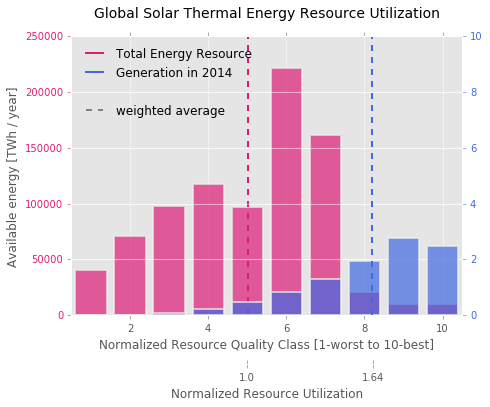

wind weighted average class of resources 3.24172097171
wind weighted average class of generation 6.27677889088
wind normalized resource utilization 1.9362489695


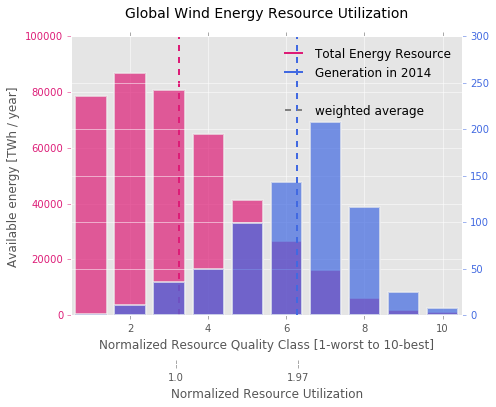

In [15]:
#pv classes = 4-14
#wind classes = 1-9
#csp classes = 1-10

groei={}#resources
groei3={}#built
sd={"pv":[],"wind":[],"csp":[]}
nru={"pv":[],"wind":[],"csp":[]}
sd2={"pv":[],"wind":[],"csp":[]}
rr={"pv":"solar","wind":"wind","csp":"csp"}
for c in res:
    croei={}
    #if True:
    try:
        for r in res[c]:
            if r not in groei: groei[r]={}
            if r not in groei3: groei3[r]={}
            
            #calculate exponential dsitribution in-country
            dynamicres={} #record initial sum of res - necessary for exhaustion mechanism
            for cl in range(10,0,-1): #start from top, step down
                if not np.isnan(res[c][r]['res'][cl]):
                    if cl not in groei[r]: groei[r][cl]=0
                    if cl not in croei: croei[cl]=0
                    v=res[c][r]['res'][cl]
                    groei[r][cl]=np.nansum([groei[r][cl],v])
                    croei[cl]=np.nansum([croei[cl],v])
                                    
                    #exponential distribution across resource classes for existing production
                    #s=res[c][r]['res'][cl]*1.0/sum(res[c][r]['res'].values()) #old, even distribution
                    if c in data:
                        for year in data[c]:
                            if rr[r] in data[c][year]['energy']:
                                if year<2015:
                                    if cl not in groei3[r]: groei3[r][cl]=0
                                    s=classconvert(res[c][r]['res'],data[c][year]['energy'][rr[r]]['cons']['navg3'])[cl]
                                    v=s*data[c][year]['energy'][rr[r]]['cons']['navg3']
                                    if not np.isnan(v):
                                        if v>0.01:
                                            sd2[r].append({"country":c,"class":cl,"value":v,"year":year})
                                            if year==2014:
                                                groei3[r][cl]=np.nansum([groei3[r][cl],v])
                                    

                    sd[r].append({"country":c,"class":cl,"value":res[c][r]['res'][cl],"year":2014})
        
    except: print 'ERROR',c
            
aroei={}
titles=['Photovoltaic','Solar Thermal','Wind']
t2=['\n10% overall efficiency\ncovering 1.5% of productive land in each country',
    '\ncalculated with 6 hours of storage\n31MW/km$^2$ power density',
    '\nonshore + offshore, calculated for 90m hub height\n 5MW/km$^2$ power density']
t2=['','','']
t3=['Global Horizontal Irradiance [kWh / sqm / day]','Direct Normal Irradiance [kWh / sqm / day]','NREL Wind Power Class']
t4=[[0.5,10.5],[0.5,10.5],[0.5,10.5]]
t5=[[0,70000],[0,250000],[0,100000]]
t6=[[0,70],[0,10],[0,300]]
t7=[[0,50000],[0,50000],[0,2000]]
locs=[2,2,1]
cvtr={"pv":0.5,"wind":1,"csp":0.64}
cvtr2={"pv":0.25,"wind":0,"csp":1.87}
for j,r in enumerate(groei):
#if True:
    x=[]
    y=[]
    for i in range(len(sorted(groei[r].keys()))):
        if float(groei[r][sorted(groei[r].keys())[i]])>0.1:
            x.append(float(sorted(groei[r].keys())[i]))
            y.append(float(groei[r][sorted(groei[r].keys())[i]]))
    aroei[r]=np.average(x,weights=y)
    fig=plt.figure(figsize=(7,5))
    plt.bar(x,y,color='#dd1c77',lw=2,alpha=0.7, align='center')
    plt.title('Global '+titles[j]+' Energy Resource'+t2[j]+' Utilization',fontsize=14,y=1.05)
    plt.ylabel('Available energy [TWh / year]')
    plt.xlabel('Normalized Resource Quality Class [1-worst to 10-best]')
    plt.ylim(t5[j])
    plt.tick_params(axis='y', colors='#dd1c77')
    z=np.average(x,weights=y)
    print r,'weighted average class of resources',z
    z2=z*1.0
    plt.axvline(z,color='#dd1c77',lw=2,ls='--')
    #new_tick_locations = [2,8]+[np.round(z,1)]
    new_tick_locations = [np.round(z,1)]


    x=[]
    y=[]
    for i in range(len(sorted(groei3[r].keys()))):
        x.append(float(sorted(groei[r].keys())[i]))
        y.append(float(groei3[r][sorted(groei3[r].keys())[i]]))
    ax=plt.twinx()
    plt.plot([-10],[-10],color='#dd1c77',lw=2,label='Total Energy Resource')
    plt.plot([-10],[-10],color='royalBlue',lw=2,label='Generation in 2014')
    ax.bar(x,y,color='royalBlue',lw=2,alpha=0.7, align='center')
    plt.plot([-10],[-10],color='grey',lw=2,ls='',label=' ')
    plt.plot([-10],[-10],color='grey',lw=2,ls='--',label='weighted average')
    ax.tick_params(axis='y', colors='royalBlue')
    z=np.average(x,weights=y)
    print r,'weighted average class of generation',z
    print r,'normalized resource utilization',z/z2
    plt.axvline(z,color='royalBlue',lw=2,ls='--')
    plt.ylim(t6[j])
    plt.xlim(t4[j])
    plt.legend(loc=locs[j],framealpha=0)

    ax2 = fig.add_axes((0.16,-0.01,0.705,0.0))
    ax2.yaxis.set_visible(False)
    ax2.set_xlabel('Normalized Resource Utilization')
    ax2.set_xlim(1,10)

    new_tick_locations += [np.round(z,1)]
    new_ticks = np.round(np.array(new_tick_locations)/new_tick_locations[0],2)
    
    nru[r]=new_tick_locations
    
    ax2.set_xticks(new_tick_locations)
    ax2.set_xticklabels(new_ticks)

#wind class http://rredc.nrel.gov/wind/pubs/atlas/appendix_A.html
#NREL Renewable Resource Data Center
    plt.savefig(str(r)+'3.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
    plt.savefig('plots/'+str(r)+'.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
    plt.show()

save for viz

In [55]:
#save
file(pop_path+'../universal/res.json','w').write(json.dumps({"res":sd,"inst":sd2})) 
import zipfile
try:
    import zlib
    compression = zipfile.ZIP_DEFLATED
except:
    compression = zipfile.ZIP_STORED
zf = zipfile.ZipFile(pop_path+'../universal/res.zip', mode='w')
zf.write(pop_path+'../universal/res.json','res.json',compress_type=compression)
zf.close()

save for later

In [56]:
file('data/resources/res_redist.json','w').write(json.dumps(newres))

shares

In [58]:
#normalized resource utilization
nru

{'csp': [5.0, 8.1999999999999993],
 'pv': [7.0999999999999996, 6.2000000000000002],
 'wind': [3.2000000000000002, 6.2999999999999998]}

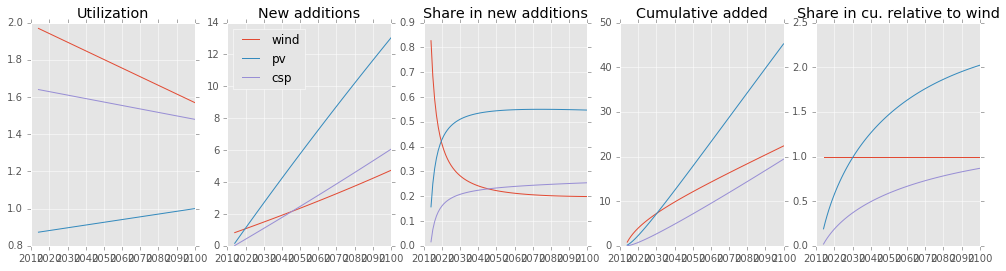

In [59]:
#shares
w=[0.827]
p=[0.157]
c=[0.016]
#Shares
W=[0.827]
P=[0.157]
C=[0.016]
#thetas - normalized resource utilization
wt=[1.09] #wind
wp=[0.68] #pv
wc=[1.18] #csp
wt=[nru['wind'][1]/nru['wind'][0]] #wind
wp=[nru['pv'][1]/nru['pv'][0]] #pv
wc=[nru['csp'][1]/nru['csp'][0]] #csp
#js
jt=[1] #wind
jp=[1.77] #pv
jc=[1.59] #csp
javg=(nru['wind'][0]+nru['csp'][0]+nru['pv'][0])/3.0
jt=[nru['wind'][0]/javg] #wind
jp=[nru['pv'][0]/javg] #pv
jc=[nru['csp'][0]/javg] #csp

tgt=1.57 #target share wind
tgp=1 #target share pv
tgc=1.48 #target share csp
s=0.35
z=0.5
f=2
x=[2014]
for i in range(2015,2101):
    k=i-2014
    x.append(i)
    wt.append(wt[0]+(tgt-wt[0])*(i-2014)/(2101-2015))
    wp.append(wp[0]+(tgp-wp[0])*(i-2014)/(2101-2015))
    wc.append(wc[0]+(tgc-wc[0])*(i-2014)/(2101-2015))
    w.append(w[k-1]+((1.0/3)*(1/wt[k-1])**z*jt[0]**s)**f)
    p.append(p[k-1]+((1.0/3)*(1/wp[k-1])**z*jp[0]**s)**f)
    c.append(c[k-1]+((1.0/3)*(1/wc[k-1])**z*jc[0]**s)**f)
    jt.append(jt[0])
    jp.append(jp[0])
    jc.append(jc[0])
    W.append(W[k-1]+w[k]/(w[k]+p[k]+c[k]))
    P.append(P[k-1]+p[k]/(w[k]+p[k]+c[k]))
    C.append(C[k-1]+c[k]/(w[k]+p[k]+c[k]))
    
fig,ax=plt.subplots(1,5,figsize=(17,4))
ax[0].plot(x,wt)
ax[0].plot(x,wp)
ax[0].plot(x,wc)
ax[0].set_title('Utilization')
ax[1].plot(x,w,label='wind')
ax[1].plot(x,p,label='pv')
ax[1].plot(x,c,label='csp')
ax[1].legend(loc=2)
ax[1].set_title('New additions')
ax[3].plot(x,W)
ax[3].plot(x,P)
ax[3].plot(x,C)
ax[3].set_title('Cumulative added')
ax[2].plot(x,[w[k]/(w[k]+p[k]+c[k]) for k in range(len(w))])
ax[2].plot(x,[p[k]/(w[k]+p[k]+c[k]) for k in range(len(w))])
ax[2].plot(x,[c[k]/(w[k]+p[k]+c[k]) for k in range(len(w))])
ax[2].set_title('Share in new additions')
ax[4].plot(x,[W[k]/W[k] for k in range(len(w))])
ax[4].plot(x,[P[k]/W[k] for k in range(len(w))])
ax[4].plot(x,[C[k]/W[k] for k in range(len(w))])
ax[4].set_title('Share in cu. relative to wind')
plt.show()

In [68]:
for year in [86]:
    print x[year],'omega wind',W[year]*1.0/(W[year]+P[year]+C[year]),
    print 'omega pv',P[year]*1.0/(W[year]+P[year]+C[year]),
    print 'omega csp',C[year]*1.0/(W[year]+P[year]+C[year])

2100 omega wind 0.257054639053 omega pv 0.519887654827 omega csp 0.22305770612


In [69]:
for year in [6,26,46,66,86]:
    print x[year],'omega/wind wind',W[year]*1.0/(W[year]),
    print 'omega/wind pv',P[year]*1.0/(W[year]),
    print 'omega/wind csp',C[year]*1.0/(W[year])

2020 omega/wind wind 1.0 omega/wind pv 0.579075359648 omega/wind csp 0.188456527352
2040 omega/wind wind 1.0 omega/wind pv 1.26459829228 omega/wind csp 0.494114852701
2060 omega/wind wind 1.0 omega/wind pv 1.63175468273 omega/wind csp 0.666491573744
2080 omega/wind wind 1.0 omega/wind pv 1.8649120938 omega/wind csp 0.782938078709
2100 omega/wind wind 1.0 omega/wind pv 2.02247917696 omega/wind csp 0.867744332264


In [76]:
eroei={"pv":12,"wind":22,"csp":12}
xk={"pv":tgp,"wind":tgt,"csp":tgc}
rtau={}
for r in eroei:
    rtau[r]=eroei[r]*1.0/(nru[r][1]/nru[r][0])
    print r,': theta',nru[r][1]/nru[r][0],'xk',xk[r],'rtau',rtau[r],'avg class',nru[r][0]

pv : theta 0.87323943662 xk 1 rtau 13.7419354839 avg class 7.1
csp : theta 1.64 xk 1.48 rtau 7.31707317073 avg class 5.0
wind : theta 1.96875 xk 1.57 rtau 11.1746031746 avg class 3.2


<p><br><p>We would like to express our gratitude to all of the developers of the libraries used and especially to the affiliates of <i>EIA, BP and World Bank</i> - and for this particular workbook <i>NREL</i>, for their great database and openly accesible data. The data manipulation algorithms are open sourced and freely reproducible under an <a href="http://opensource.org/licenses/MIT" target="_blank">MIT license</a>.</p>
<br>
<p><a href="http://www.csaladen.es" target="_blank">Dénes Csala</a>&nbsp;&nbsp;|&nbsp;&nbsp;2016</p>